#To run the models, run it cell by cell, no change is needed

In [1]:
## Clone the Github Repo

import shutil
import os, sys
import json

shutil.rmtree('/content/UU_POSTDOC_ASSINGMENT', ignore_errors=True)
!git clone https://github.com/Maburidi/UU_POSTDOC_ASSINGMENT.git
sys.path.insert(0,'/content/UU_POSTDOC_ASSINGMENT/')

%cd /content/UU_POSTDOC_ASSINGMENT/


Cloning into 'UU_POSTDOC_ASSINGMENT'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 118 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (118/118), 285.09 KiB | 3.39 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/UU_POSTDOC_ASSINGMENT


In [3]:
# install dependancies
!bash install_dependencies.sh


In [4]:
# Run the preprocessing steps
!python data_preprocess.py


2025-04-13 16:20:36,398 - INFO - ✅ Dataset split completed and copied to training/testing folders.


In [5]:
########################################################## CNN #####################################################
####################################################################################################################
## Train the CNN
!python train.py


--------------------------------------
FOLD 0
----------------------------------------
Epoch 1, Loss: 0.715852290391922, Training Accuracy: 45.0%
Epoch 2, Loss: 0.6931463778018951, Training Accuracy: 47.5%
Epoch 3, Loss: 0.6901891380548477, Training Accuracy: 47.5%
Epoch 4, Loss: 0.6956969797611237, Training Accuracy: 55.0%
Epoch 5, Loss: 0.6817070245742798, Training Accuracy: 55.0%
Epoch 6, Loss: 0.681119903922081, Training Accuracy: 55.0%
Epoch 7, Loss: 0.6717242896556854, Training Accuracy: 55.0%
Epoch 8, Loss: 0.6598538458347321, Training Accuracy: 62.5%
Epoch 9, Loss: 0.6492706537246704, Training Accuracy: 75.0%
Epoch 10, Loss: 0.6319307088851929, Training Accuracy: 77.5%
Epoch 11, Loss: 0.5980052351951599, Training Accuracy: 82.5%
Epoch 12, Loss: 0.5704154670238495, Training Accuracy: 87.5%
Epoch 13, Loss: 0.5194515511393547, Training Accuracy: 92.5%
Epoch 14, Loss: 0.4720723181962967, Training Accuracy: 95.0%
Epoch 15, Loss: 0.4049197882413864, Training Accuracy: 95.0%
Epoch 16,

In [6]:
## Test the CNN
from UU_POSTDOC_ASSINGMENT.test import TestModel
y_true, y_scores = TestModel()

Test Loss: 0.1925, Test Accuracy: 92.86%


In [7]:
####### EVALAUTE THE CNN

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = (np.array(y_scores) >= 0.5).astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall:    {recall:.2f}')
print(f'F1 Score:  {f1:.2f}')


Accuracy: 0.93
Precision: 0.88
Recall:    1.00
F1 Score:  0.93


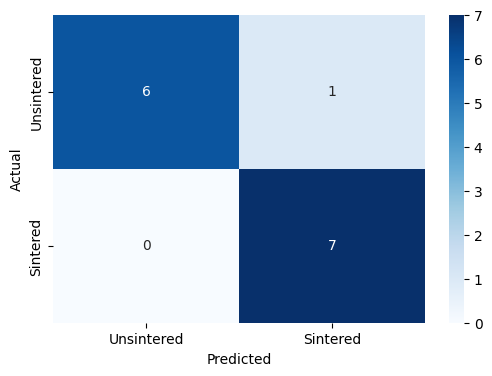

In [8]:

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unsintered', 'Sintered'],
            yticklabels=['Unsintered', 'Sintered'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [11]:
########################################################## SVM #####################################################
####################################################################################################################


import os
from skimage.feature import hog
from skimage import color
from PIL import Image
import numpy as np
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

def extract_hog_features(image_path):
    image = Image.open(image_path).convert('RGB')
    image = image.resize((60, 60))  # Resize for consistency
    gray_image = color.rgb2gray(np.array(image))
    features = hog(gray_image, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), orientations=9, block_norm='L2-Hys')
    return features

def load_dataset(directory):
    features = []
    labels = []
    for label in ['0', '1']:
        class_dir = os.path.join(directory, label)
        for file in os.listdir(class_dir):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(class_dir, file)
                feature_vector = extract_hog_features(file_path)
                features.append(feature_vector)
                labels.append(int(label))
    return np.array(features), np.array(labels)

# Load training and testing data
X_train_svm, y_train_svm = load_dataset('/content/data0/training')
X_test_svm, y_test_svm = load_dataset('/content/data0/testing')



svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(X_train_svm, y_train_svm)


X_test_svm, y_test_svm = shuffle(X_test_svm, y_test_svm, random_state=42)
y_pred_svm = svm_model.predict(X_test_svm)


Accuracy: 0.93
Precision: 1.00
Recall:    0.86
F1 Score:  0.92


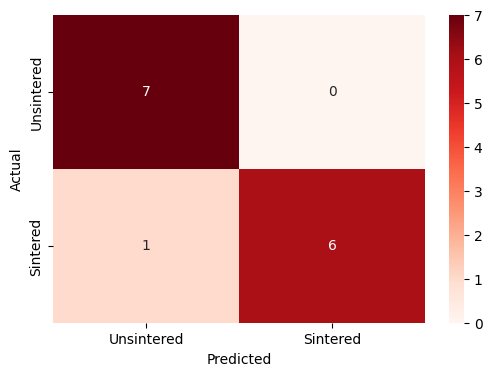

In [12]:
################# EVALAUTE SVM #################

precision = precision_score(y_test_svm, y_pred_svm)
recall = recall_score(y_test_svm, y_pred_svm)
f1 = f1_score(y_test_svm, y_pred_svm)
accuracy = accuracy_score(y_test_svm, y_pred_svm)
conf_matrix = confusion_matrix(y_test_svm, y_pred_svm)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall:    {recall:.2f}')
print(f'F1 Score:  {f1:.2f}')


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_svm, y_pred_svm), annot=True, fmt='d', cmap='Reds',
            xticklabels=['Unsintered', 'Sintered'],
            yticklabels=['Unsintered', 'Sintered'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

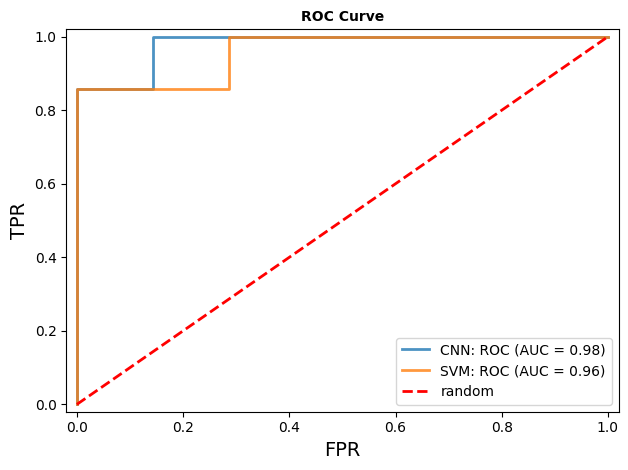

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc, roc_curve
from numpy import mean, std, interp, linspace, minimum, maximum

# Inputs:
y_score_svm = svm_model.predict_proba(X_test_svm)[:, 1]



def plot_roc_curve(true_y, y_prob, true_y_svm,y_prob_svm ):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    fpr_svm, tpr_svm, thresholds_svm = roc_curve(true_y_svm, y_prob_svm)

    Auc = auc(fpr, tpr)
    Auc_svm = auc(fpr_svm, tpr_svm)

    plt.plot(fpr, tpr, label=r'CNN: ROC (AUC = %0.2f)' % (Auc),
             linewidth=2.0, alpha=0.80)
    plt.plot(fpr_svm, tpr_svm, label=r'SVM: ROC (AUC = %0.2f)' % (Auc_svm),
             linewidth=2.0, alpha=0.80)

    x = [0.0, 1.0]
    plt.plot(x, x, linestyle='dashed', color='red', linewidth=2.0, label='random')
    plt.xlim(-0.02, 1.02)
    plt.ylim(-0.02, 1.02)
    plt.legend(fontsize=10, loc='best')
    plt.xlabel('FPR', fontsize=14)
    plt.ylabel('TPR', fontsize=14)
    title_lines = []
    title_lines.append('ROC Curve')
    plt.title('\n'.join([t for t in title_lines]), fontsize=10, weight='bold', linespacing=2.0)
    plt.tight_layout()


plot_roc_curve(y_true, y_scores,y_test_svm,y_score_svm)
plt.savefig("fname.jpeg",dpi=300)